<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>



# **Final Project: Boston Housing**


##### Estimated time needed: **60** minutes


#### Import the required libraries we need for the lab.


In [3]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [4]:
import pandas as pd
import pandas as pd 
from statsmodels.formula.api import ols
import numpy as np

#### Read the dataset in the csv file from the URL


In [5]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [6]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [7]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [8]:
boston_df.drop(columns=['Unnamed: 0'], inplace= True)

In [9]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's

In [10]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [11]:
boston_df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.61,8.60,0.01,0.08,0.26,3.68,88.98
ZN,506.0,11.36,23.32,0.00,0.00,0.00,12.50,100.00
INDUS,506.0,11.14,6.86,0.46,5.19,9.69,18.10,27.74
CHAS,506.0,0.07,0.25,0.00,0.00,0.00,0.00,1.00
NOX,506.0,0.55,0.12,0.38,0.45,0.54,0.62,0.87
RM,506.0,6.28,0.70,3.56,5.89,6.21,6.62,8.78
AGE,506.0,68.57,28.15,2.90,45.02,77.50,94.07,100.00
DIS,506.0,3.80,2.11,1.13,2.10,3.21,5.19,12.13
RAD,506.0,9.55,8.71,1.00,4.00,5.00,24.00,24.00
TAX,506.0,408.24,168.54,187.00,279.00,330.00,666.00,711.00


In [12]:
medval=boston_df.MEDV.value_counts()

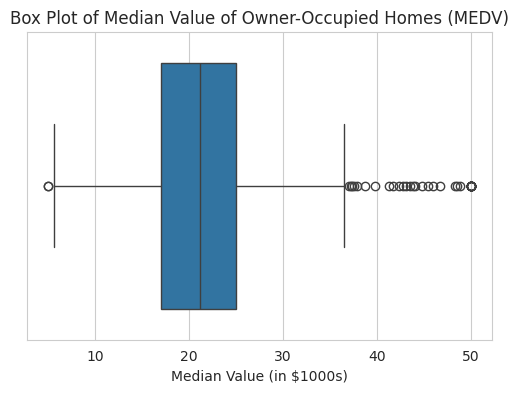

In [13]:
# Set a visual style (optional, enhances appearance)
sns.set_style("whitegrid")

plt.figure(figsize=(6, 4)) # Optional: Adjusts the figure size

# Create the box plot using the MEDV column
sns.boxplot(x=boston_df['MEDV'])

plt.title('Box Plot of Median Value of Owner-Occupied Homes (MEDV)')
plt.xlabel('Median Value (in $1000s)')

plt.show()

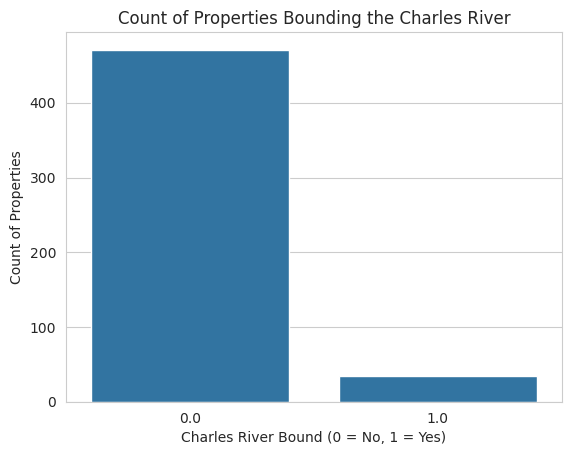

In [14]:
plt.Figure(figsize=(6, 4))

# Create the count plot
sns.countplot(x='CHAS', data=boston_df)

plt.title('Count of Properties Bounding the Charles River')
plt.xlabel('Charles River Bound (0 = No, 1 = Yes)')
plt.ylabel('Count of Properties')
plt.show()

<ipython-input-15-0aa649487735>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='AGE_group', y='MEDV', data=boston_df, palette='pastel')


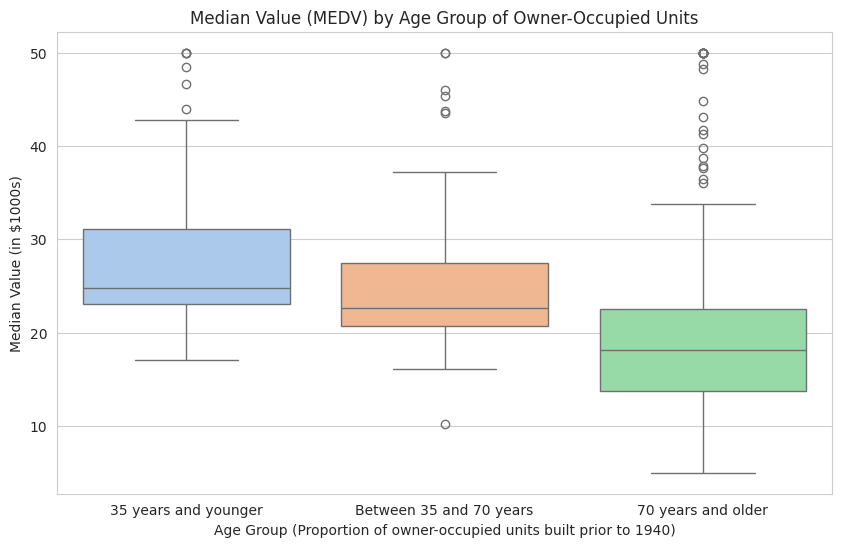

In [15]:
bins = [0, 35, 70, np.inf]

# 2. Define the labels for the bins
labels = ['35 years and younger', 'Between 35 and 70 years', '70 years and older']

# 3. Discretize the 'AGE' column to create a new categorical column
boston_df['AGE_group'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels, right=False)
# The 'right=False' ensures the bins are [0, 35), [35, 70), [70, inf), matching the request.

# 4. Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='AGE_group', y='MEDV', data=boston_df, palette='pastel')

plt.title('Median Value (MEDV) by Age Group of Owner-Occupied Units')
plt.xlabel('Age Group (Proportion of owner-occupied units built prior to 1940)')
plt.ylabel('Median Value (in $1000s)')

plt.show()

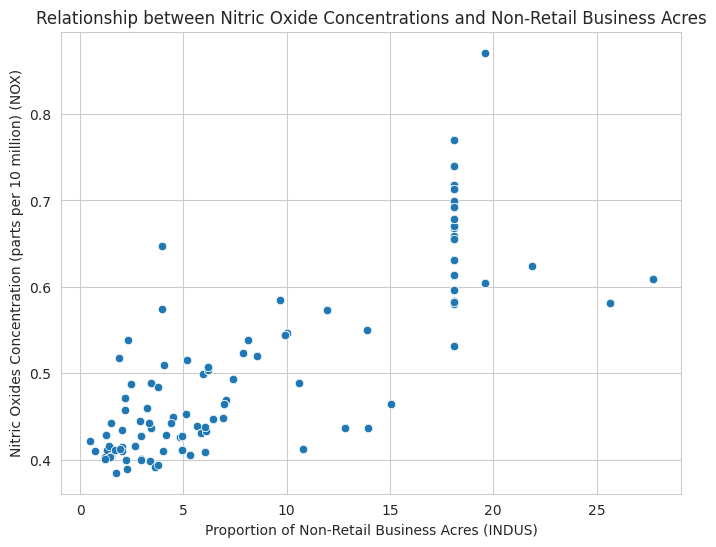

In [16]:
plt.figure(figsize=(8, 6))

# Create the scatter plot
sns.scatterplot(x='INDUS', y='NOX', data=boston_df)

plt.title('Relationship between Nitric Oxide Concentrations and Non-Retail Business Acres')
plt.xlabel('Proportion of Non-Retail Business Acres (INDUS)')
plt.ylabel('Nitric Oxides Concentration (parts per 10 million) (NOX)')

plt.show()

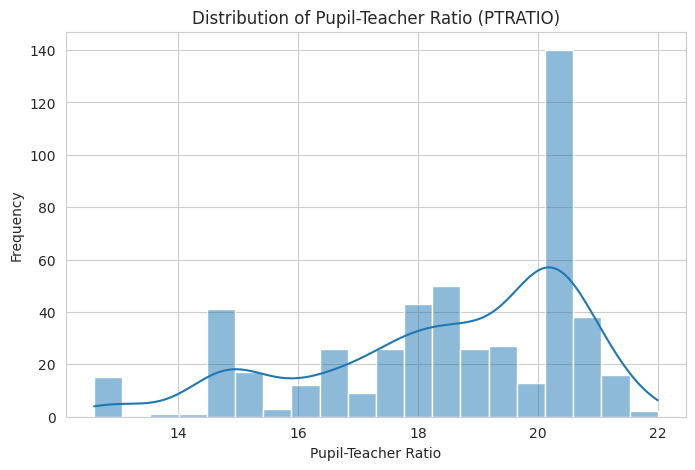

In [17]:
plt.figure(figsize=(8, 5))

# Create the histogram
sns.histplot(data=boston_df, x='PTRATIO', bins=20, kde=True) # kde=True adds a smoothing line

plt.title('Distribution of Pupil-Teacher Ratio (PTRATIO)')
plt.xlabel('Pupil-Teacher Ratio')
plt.ylabel('Frequency')

plt.show()

---

---

# **1. T-Test: Does the median value differ for homes near the Charles River?**

### **Hypotheses**

* **H₀:** μ₀ = μ₁ (no difference in MEDV between CHAS=0 and CHAS=1)
* **H₁:** μ₀ ≠ μ₁ (there *is* a difference)

In [18]:
# T-test for independent samples
chas_0 = boston_df[boston_df['CHAS'] == 0]['MEDV']
chas_1 = boston_df[boston_df['CHAS'] == 1]['MEDV']

t_stat, p_val = scipy.stats.ttest_ind(chas_0, chas_1, equal_var=False)

t_stat, p_val

(-3.113291312794837, 0.003567170098137517)

### **Conclusion**

In [19]:
alpha = 0.05
if p_val < alpha:
    print("Reject H0: There IS a significant difference in MEDV based on Charles River proximity.")
else:
    print("Fail to reject H0: NO significant difference in MEDV based on Charles River proximity.")

Reject H0: There IS a significant difference in MEDV based on Charles River proximity.


---

---

# **2. One-Way ANOVA: Does AGE group influence MEDV?**

### **Hypotheses**

* **H₀:** All AGE groups have equal MEDV means.
* **H₁:** At least one AGE group has a different MEDV mean.

In [20]:
age1 = boston_df[boston_df['AGE_group'] == '35 years and younger']['MEDV']
age2 = boston_df[boston_df['AGE_group'] == 'Between 35 and 70 years']['MEDV']
age3 = boston_df[boston_df['AGE_group'] == '70 years and older']['MEDV']

f_stat, p_val_anova = scipy.stats.f_oneway(age1, age2, age3)

f_stat, p_val_anova

(36.40764999196599, 1.7105011022702984e-15)

### **Conclusion**

In [21]:
alpha = 0.05
if p_val_anova < alpha:
    print("Reject H0: AGE group DOES affect the Median Value (MEDV).")
else:
    print("Fail to reject H0: AGE group does NOT affect the Median Value (MEDV).")

Reject H0: AGE group DOES affect the Median Value (MEDV).


---

---

# **3. Pearson Correlation: Relationship between INDUS and NOX**

### **Hypotheses**

* **H₀:** ρ = 0 (no linear correlation)
* **H₁:** ρ ≠ 0 (there is correlation)

In [22]:
corr, p_val_corr = scipy.stats.pearsonr(boston_df['INDUS'], boston_df['NOX'])

corr, p_val_corr

(0.7636514469209192, 7.913361061210442e-98)

### **Conclusion**

In [23]:
alpha = 0.05
if p_val_corr < alpha:
    print("Reject H0: There IS a significant linear relationship between INDUS and NOX.")
else:
    print("Fail to reject H0: NO significant linear relationship between INDUS and NOX.")

Reject H0: There IS a significant linear relationship between INDUS and NOX.


---

---

# **4. Regression: Effect of DIS on MEDV**

### **Hypotheses**

* **H₀:** β₁ = 0 (distance has *no* impact on MEDV)
* **H₁:** β₁ ≠ 0 (distance *does* impact MEDV)

In [24]:
from scipy.stats import linregress

slope, intercept, r_value, p_val_reg, std_err = linregress(boston_df['DIS'], boston_df['MEDV'])

slope, p_val_reg, r_value**2

(1.0916130158411097, 1.2066117273371223e-08, 0.06246437212178246)

### **Conclusion**

In [25]:
alpha = 0.05
if p_val_reg < alpha:
    print("Reject H0: DIS DOES have a significant impact on MEDV.")
    print(f"Interpretation: For each one-unit increase in DIS, MEDV changes by {slope:.3f} (in $1000s).")
else:
    print("Fail to reject H0: DIS does NOT significantly impact MEDV.")

Reject H0: DIS DOES have a significant impact on MEDV.
Interpretation: For each one-unit increase in DIS, MEDV changes by 1.092 (in $1000s).


---

---